# Classification and Regression using XGBoost

#### Make Imports

In [17]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Load Numpy Data for Features and Labels

In [2]:
from numpy import save, load

X = load('numpy_data/feature.npy')
y_sex = load('numpy_data/y_sex.npy')
y_age = load('numpy_data/y_age.npy')

In [3]:
X.shape, y_sex.shape, y_age.shape

((4524, 1, 5603), (4524,), (4524,))

Reshape X to 1D array

In [4]:
# mfcc = 13
# 10 second audio = 431 cols

input_size = 13*431
X = X.reshape(4524, input_size)

# Split Dataset for Gender

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_sex, random_state=42, stratify=y_sex)

### Gender Classification Model

In [6]:
classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, use_label_encoder=False, eval_metric='aucpr')

#### Train Gender Classifier

In [7]:
classifier.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.46773
[1]	validation_0-aucpr:0.55717
[2]	validation_0-aucpr:0.61451
[3]	validation_0-aucpr:0.66145
[4]	validation_0-aucpr:0.68464
[5]	validation_0-aucpr:0.69922
[6]	validation_0-aucpr:0.71360
[7]	validation_0-aucpr:0.71961
[8]	validation_0-aucpr:0.73289
[9]	validation_0-aucpr:0.74481
[10]	validation_0-aucpr:0.75180
[11]	validation_0-aucpr:0.75941
[12]	validation_0-aucpr:0.76391
[13]	validation_0-aucpr:0.76928
[14]	validation_0-aucpr:0.77490
[15]	validation_0-aucpr:0.77836
[16]	validation_0-aucpr:0.78549
[17]	validation_0-aucpr:0.78825
[18]	validation_0-aucpr:0.79358
[19]	validation_0-aucpr:0.79634
[20]	validation_0-aucpr:0.80440
[21]	validation_0-aucpr:0.80851
[22]	validation_0-aucpr:0.80952
[23]	validation_0-aucpr:0.81229
[24]	validation_0-aucpr:0.81417
[25]	validation_0-aucpr:0.81792
[26]	validation_0-aucpr:0.81822
[27]	validation_0-aucpr:0.81745
[28]	validation_0-aucpr:0.81830
[29]	validation_0-aucpr:0.81856
[30]	validation_0-aucpr:0.81822
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=0, silent=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Make Predictions

In [8]:
y_pred = classifier.predict(X_test)

### Evaluation Metrics

In [9]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
print("Test Accuracy: ", accuracy_score(y_pred, y_test))

Test Accuracy:  0.9133510167992926


In [15]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X, y_sex, cv=5)

print("Cross Validation Mean Score: ", score.mean())

Cross Validation Mean Score:  0.8821962548281425


In [10]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F-Score: ", fscore)
print("Support: ", support)

Precision:  [0.91038697 0.93288591]
Recall:  [0.98893805 0.6123348 ]
F-Score:  [0.94803818 0.7393617 ]
Support:  [904 227]


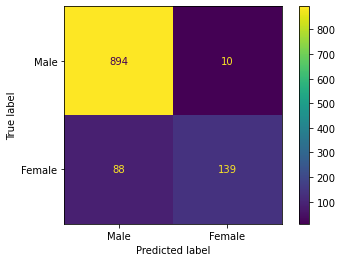

In [11]:
plot_confusion_matrix(classifier, X_test, y_test, values_format='d', display_labels=['Male', 'Female']);

### Results

Model Precision:

- Out of 982 Male predictions, 91.0% were correctly predicted
- Out of 149 Female predictions, 93.3% were correctly predicted

Model Recall:

- Out of 904 actual Male data, 98.9% were correctly predicted
- Out of 227 actual Female data, 61.2% were correctly predicted

-
-

# Split Dataset for Age Prediction

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_age, random_state=42, stratify=y_age)

### Age Regressor Model

In [13]:
from xgboost import XGBRegressor

regressor = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=12, min_child_weight=7, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=0)

Use Mean Absolute Error as Evaluation Metric

In [14]:
regressor.fit(Xtrain, ytrain, early_stopping_rounds=10, eval_metric='mae', eval_set=[(Xtest, ytest)])

[0]	validation_0-mae:50.26297
[1]	validation_0-mae:47.82002
[2]	validation_0-mae:45.50108
[3]	validation_0-mae:43.29748
[4]	validation_0-mae:41.24695
[5]	validation_0-mae:39.28884
[6]	validation_0-mae:37.40880
[7]	validation_0-mae:35.61849
[8]	validation_0-mae:33.93438
[9]	validation_0-mae:32.33742
[10]	validation_0-mae:30.82245
[11]	validation_0-mae:29.38681
[12]	validation_0-mae:28.02924
[13]	validation_0-mae:26.75335
[14]	validation_0-mae:25.60268
[15]	validation_0-mae:24.49314
[16]	validation_0-mae:23.44136
[17]	validation_0-mae:22.47683
[18]	validation_0-mae:21.60918
[19]	validation_0-mae:20.78736
[20]	validation_0-mae:20.02108
[21]	validation_0-mae:19.33820
[22]	validation_0-mae:18.65720
[23]	validation_0-mae:18.05684
[24]	validation_0-mae:17.49698
[25]	validation_0-mae:16.97542
[26]	validation_0-mae:16.50601
[27]	validation_0-mae:16.05544
[28]	validation_0-mae:15.65171
[29]	validation_0-mae:15.26558
[30]	validation_0-mae:14.93124
[31]	validation_0-mae:14.59938
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=12,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

Make Predictions

In [15]:
ypred = regressor.predict(Xtest)

### Evaluation Metrics

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error",mean_squared_error(ytest,ypred))
print("Root MSE",np.sqrt(mean_squared_error(ytest,ypred)))
print("RMS Log Error",np.log(np.sqrt(mean_squared_error(ytest,ypred))))

r2 = r2_score(ytest,ypred)
print("R Squared Error: ", r2)

Mean Absolute Error:  11.35081652599979
Mean Squared Error 200.62649705166396
Root MSE 14.164268320378005
RMS Log Error 2.650722477898099
R Squared Error:  0.17200870885366737


-
-

-
-

-
-

# Classification and Regression using Support Vector

In [19]:
from sklearn import svm

#### SVM Model

In [20]:
model = svm.SVC(kernel='poly', C=1, degree=2, coef0=0.3)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)

x_pred = model.predict(X_train)
print("Train Accuracy: ", accuracy_score(x_pred, y_train))

y_pred = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_pred, y_test))

Train Accuracy:  0.9086354258768052
Test Accuracy:  0.8885941644562334


In [29]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X, y_sex, cv=5)

print("Cross Validation Mean Score: ", score.mean())

Cross Validation Mean Score:  0.8821962548281425


#### Metrics

In [21]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F-Score: ", fscore)
print("Support: ", support)

Precision:  [0.90605428 0.79190751]
Recall:  [0.96017699 0.60352423]
F-Score:  [0.93233083 0.685     ]
Support:  [904 227]


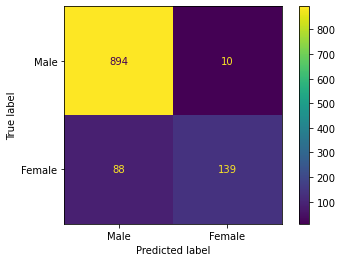

In [22]:
plot_confusion_matrix(classifier, X_test, y_test, values_format='d', display_labels=['Male', 'Female']);

## SVM Results

Model Accuracy:
- 82.6% accuracy on Test data
- 83.1% accuracy on Cross Validation (average)

Model Precision:
- Out of 982 Male predictions, 90.6% were correctly predicted
- Out of 149 Female predictions, 79.2% were correctly predicted

Model Recall:
- Out of 904 actual Male data, 96.0% were correctly predicted
- Out of 227 actual Female data, 60.4% were correctly predicted

-
-

#### SVR Model

In [24]:
from sklearn.svm import SVR

In [25]:
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtrain, ytrain)

SVR()

In [26]:
ypred = regressor.predict(Xtest)

## Metrics

In [27]:
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error",mean_squared_error(ytest,ypred))
print("Root MSE",np.sqrt(mean_squared_error(ytest,ypred)))
print("RMS Log Error",np.log(np.sqrt(mean_squared_error(ytest,ypred))))

r2 = r2_score(ytest,ypred)
print("R Squared Error: ", r2)

Mean Absolute Error:  11.98764066534108
Mean Squared Error 224.08121751132998
Root MSE 14.9693425878136
RMS Log Error 2.7060042821575188
R Squared Error:  0.0752104067237439


-
-
-
-
-
-
-

# Final Results

-
-

|Gender Prediction|
|---|
||

|||SVM||XGBoost|
| --- || --- || --- |
|Accuracy||88.9||91.3|
|Cross-Val Score||85.0||88.2|

|XGB Metrics||Male||Female|
|----||----||----|
|Precision||91.0||93.3|
|Recall||98.9||61.2|
|F1 Score||94.8||73.9|

|SVM Metrics||Male||Female|
|----||----||----|
|Precision||90.6||79.2|
|Recall||96.0||60.4|
|F1 Score||93.2||68.5|


-
-

|Age Prediction|
|---|
||

|Evaluation Metric||SVM||XGBoost|
| --- || --- || --- |
|Mean Absolute Error||11.99||11.35|
|Mean Squared Error||224.08||200.63|
|Root Mean Squared Error||14.97||14.16|
|Root Mean Squared Log Error||2.71||2.65|
|R Squared Error||0.08||0.17|